In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r'C:\Users\SanjayG\Desktop\de\schema\curated\curated.csv')

# Summary of the dataset
print("Dataset Info:\n")
data.info()

print("\nMissing Values:\n", data.isnull().sum())

print("\nBasic Statistics:\n", data.describe())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               5982 non-null   object
 1   skillname_x       5982 non-null   object
 2   coursename        5982 non-null   object
 3   certificate_link  5982 non-null   object
 4   score             5982 non-null   int64 
 5   approval          5982 non-null   bool  
 6   userId            5982 non-null   object
 7   name              5982 non-null   object
 8   email             5982 non-null   object
 9   role              5982 non-null   object
 10  department        5982 non-null   object
 11  designation       5982 non-null   object
 12  createdAt         5982 non-null   object
 13  __v               5982 non-null   int64 
 14  skillname_y       5982 non-null   object
dtypes: bool(1), int64(2), object(12)
memory usage: 660.3+ KB

Missing Values:
 _id             

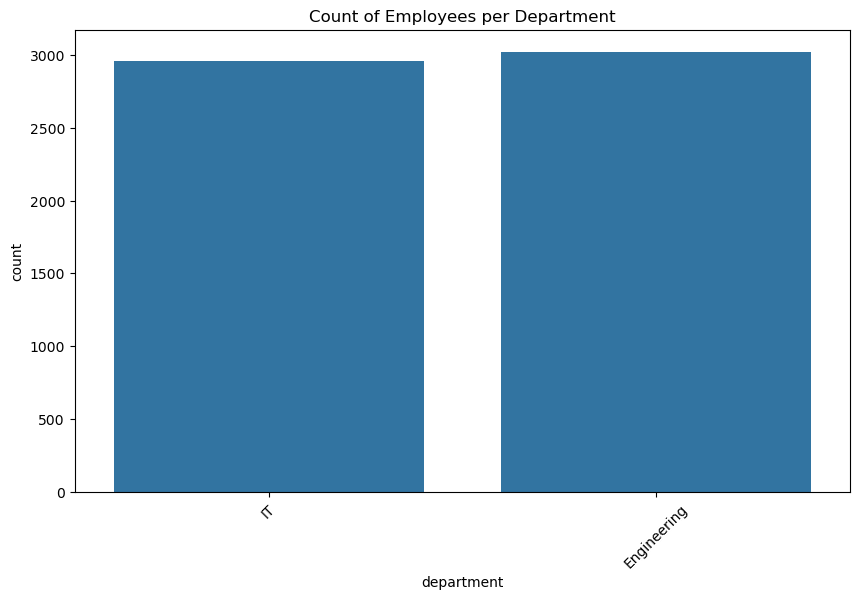

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=data)
plt.title('Count of Employees per Department')
plt.xticks(rotation=45)
plt.show()

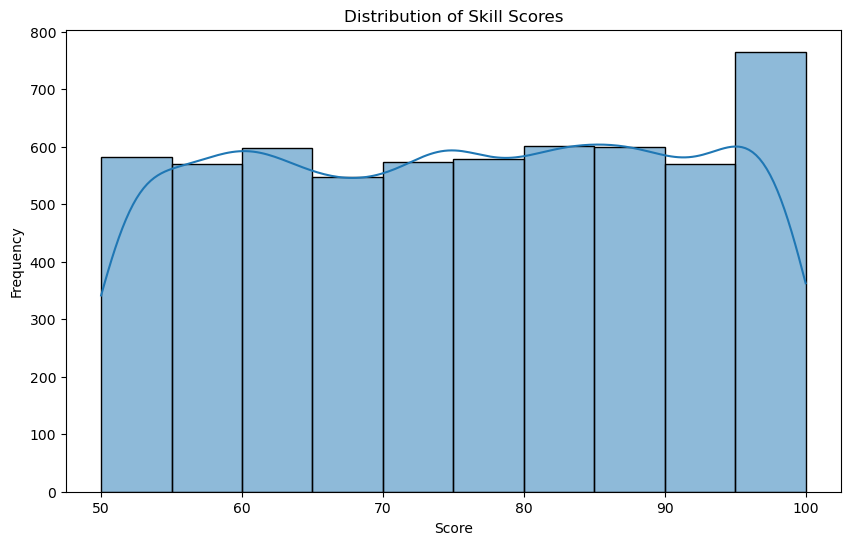

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=10, kde=True)
plt.title('Distribution of Skill Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

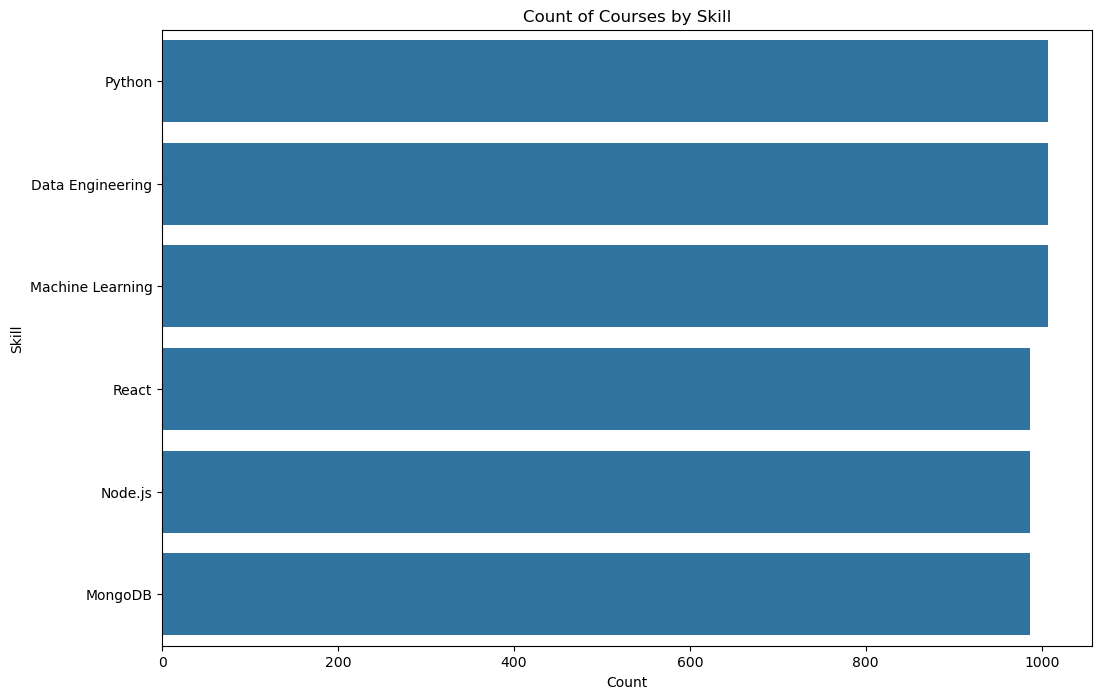

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(y='skillname_x', data=data, order=data['skillname_x'].value_counts().index)
plt.title('Count of Courses by Skill')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

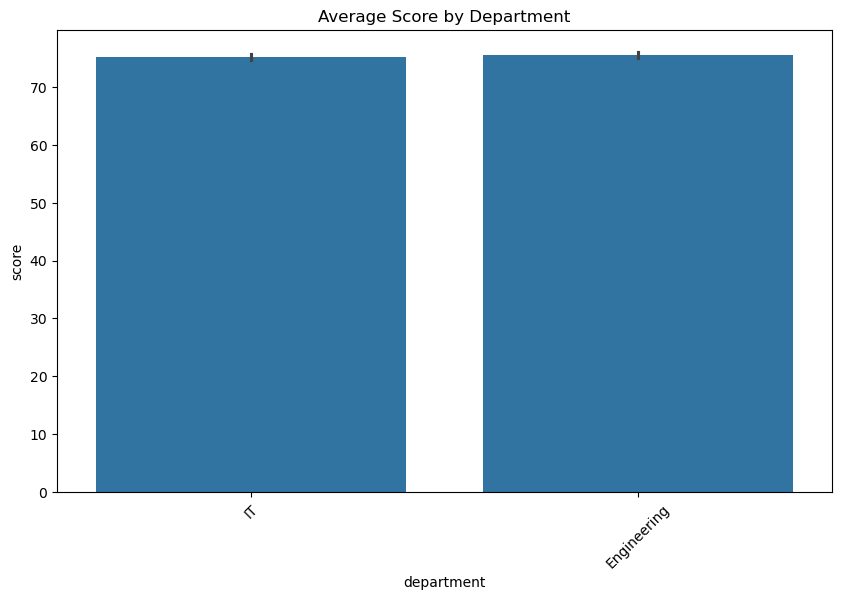

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='score', data=data, estimator=lambda x: sum(x) / len(x))
plt.title('Average Score by Department')
plt.xticks(rotation=45)
plt.show()

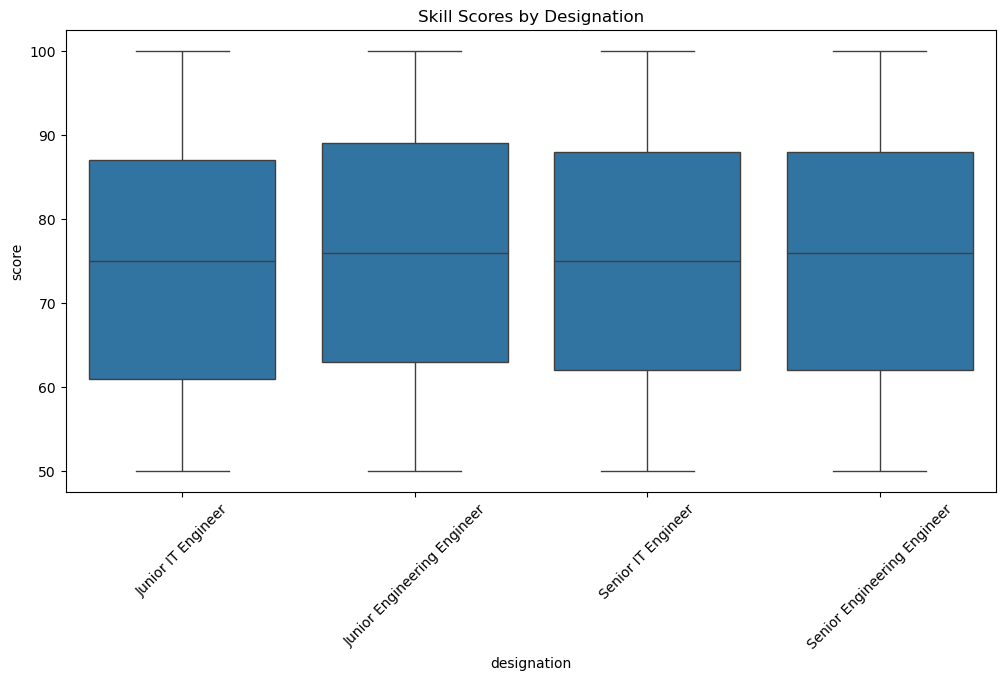

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='designation', y='score', data=data)
plt.title('Skill Scores by Designation')
plt.xticks(rotation=45)
plt.show()

In [11]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
data = df

# Step 1: Create a combined feature for skills, course, designation, and department
data['combined_features'] = data['skillname_x'] + " " + data['coursename'] + " " + data['designation'] + " " + data['department']

# Step 2: Vectorize the combined features
cv = CountVectorizer()
vectorized_features = cv.fit_transform(data['combined_features'])

# Step 3: Calculate cosine similarity
cosine_sim = cosine_similarity(vectorized_features)

# Step 4: Recommend a unique course based on a user
def get_recommendations(userId, data, cosine_sim):
    # Find the index of the user in the dataframe
    user_idx = data[data['userId'] == userId].index[0]
    
    # Get the cosine similarity scores for that user
    sim_scores = list(enumerate(cosine_sim[user_idx]))
    
    # Sort the courses based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top similar courses (excluding the user's own courses)
    sim_scores = sim_scores[1:]
    
    # Get the course indices
    course_indices = [i[0] for i in sim_scores]
    
    # Get the recommended courses and remove duplicates
    recommended_courses = data[['coursename', 'skillname_x', 'designation', 'department']].iloc[course_indices].drop_duplicates(subset='coursename').head(1)
    
    return recommended_courses

# Example: Recommend a unique course for a given userId
user_id = '670627fde88879333ce6f7b7'  # You can input any user ID here
recommendations = get_recommendations(user_id, data, cosine_sim)

print("Recommended Course:")
print(recommendations)

Recommended Course:
             coursename skillname_x         designation department
24  React for Beginners       React  Junior IT Engineer         IT
